In [86]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [87]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2
)
train_set = train_datagen.flow_from_directory(
    'data/trainingSet',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

Found 30803 images belonging to 10 classes.


In [88]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    'data/testSet',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

Found 11197 images belonging to 10 classes.


CNN

In [89]:
cnn = tf.keras.models.Sequential()

Convolution

In [90]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

Pooling

In [91]:
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))

2nd Convolutional Layer

In [92]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))

3rd Convolutional Layer

In [93]:
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))

Flattening

In [94]:
cnn.add(tf.keras.layers.Flatten())

Full Connection

In [95]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [96]:
cnn.add(tf.keras.layers.Dropout(0.5))

Output Layer

In [97]:
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

Training

In [98]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [99]:
result = cnn.fit(x=train_set, validation_data=test_set, epochs=25)

Epoch 1/25
963/963 ━━━━━━━━━━━━━━━━━━━━ 36s 37ms/step - accuracy: 0.9171 - loss: 0.2664 - val_accuracy: 0.9816 - val_loss: 0.0564
Epoch 2/25
963/963 ━━━━━━━━━━━━━━━━━━━━ 36s 38ms/step - accuracy: 0.9696 - loss: 0.1044 - val_accuracy: 0.9885 - val_loss: 0.0395
Epoch 3/25
963/963 ━━━━━━━━━━━━━━━━━━━━ 39s 40ms/step - accuracy: 0.9753 - loss: 0.0808 - val_accuracy: 0.9893 - val_loss: 0.0325
Epoch 4/25
963/963 ━━━━━━━━━━━━━━━━━━━━ 30s 31ms/step - accuracy: 0.9797 - loss: 0.0667 - val_accuracy: 0.9893 - val_loss: 0.0407
Epoch 5/25
963/963 ━━━━━━━━━━━━━━━━━━━━ 30s 31ms/step - accuracy: 0.9823 - loss: 0.0576 - val_accuracy: 0.9891 - val_loss: 0.0364
Epoch 6/25
963/963 ━━━━━━━━━━━━━━━━━━━━ 30s 31ms/step - accuracy: 0.9842 - loss: 0.0520 - val_accuracy: 0.9908 - val_loss: 0.0341
Epoch 7/25
963/963 ━━━━━━━━━━━━━━━━━━━━ 30s 31ms/step - accuracy: 0.9860 - loss: 0.0477 - val_accuracy: 0.9914 - val_loss: 0.0304
Epoch 8/25
963/963 ━━━━━━━━━━━━━━━━━━━━ 30s 31ms/step - accuracy: 0.9858 - loss: 0.0442 - 

In [101]:
print(result.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


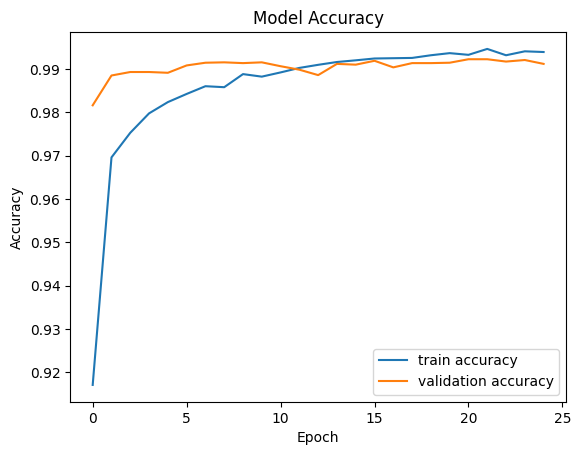

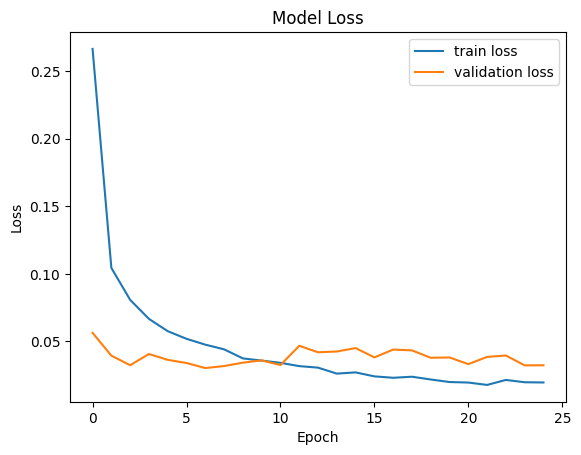

In [103]:
import matplotlib.pyplot as plt

plt.plot(result.history['accuracy'], label='train accuracy')
plt.plot(result.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Single Prediction

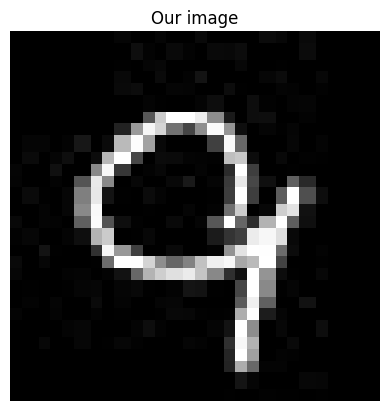

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted Digit: 9


In [160]:
from tensorflow.keras.preprocessing import image
import numpy as np

test_image = image.load_img('data/Prediction/img_4945.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis=0)

plt.imshow(test_image[0].astype('uint8'))
plt.title("Our image")
plt.axis('off')
plt.show()

single_pred = cnn.predict(test_image)
single_pred_class = np.argmax(single_pred, axis=1)[0]
print("Predicted Digit:", single_pred_class)


Prediction

In [161]:
import os
import pandas as pd

folder = 'data/Prediction'
img_files = [f for f in os.listdir(folder)]

pred_classes = []

for f in img_files:
    img_path = os.path.join(folder, f)
    img = image.load_img(img_path, target_size=(64,64))
    img_array = image.img_to_array(img)/255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = cnn.predict(img_array)
    pred_class = np.argmax(prediction, axis=1)[0]
    pred_classes.append(pred_class)

df = pd.DataFrame({
    "Filename": img_files,
    "Prediction": pred_classes
})
df.to_csv("predictions.csv", index=False)
df

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

,Filename,Prediction
0,img_329.jpg,5
1,img_2818.jpg,5
2,img_3284.jpg,3
3,img_473.jpg,9
4,img_1493.jpg,8
...,...,...
5378,img_324.jpg,9
5379,img_2815.jpg,9
5380,img_330.jpg,3
5381,img_2801.jpg,4
